In [57]:
from scipy.io import arff
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

# **Descrição Geral**

In [25]:
data, meta = arff.loadarff('speeddating.arff')
df = pd.DataFrame(data)

df.head()

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,...,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,b'0',1.0,b'female',21.0,27.0,6.0,b'[4-6]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[3-5]',7.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'0',b'0'
1,b'0',1.0,b'female',21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[3-5]',7.0,5.0,b'[6-8]',b'[5-6]',1.0,b'1',b'0',b'0'
2,b'1',1.0,b'female',21.0,22.0,1.0,b'[0-1]',b'Asian/Pacific Islander/Asian-American',b'Asian/Pacific Islander/Asian-American',b'1',...,b'[0-3]',b'[3-5]',7.0,NaN,b'[6-8]',b'[0-4]',1.0,b'1',b'1',b'1'
3,b'0',1.0,b'female',21.0,23.0,2.0,b'[2-3]',b'Asian/Pacific Islander/Asian-American',b'European/Caucasian-American',b'0',...,b'[0-3]',b'[3-5]',7.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'1',b'1'
4,b'0',1.0,b'female',21.0,24.0,3.0,b'[2-3]',b'Asian/Pacific Islander/Asian-American',b'Latino/Hispanic American',b'0',...,b'[0-3]',b'[3-5]',6.0,6.0,b'[6-8]',b'[5-6]',0.0,b'1',b'1',b'1'


- Formato .arff usa strings p representar valores categóricos, e a biblioteca scipy.io mantém esses valores como bytes p evitar problemas de encoding --> comum em datasets onde os atributos são definidos como nominal ou string.

In [26]:
# convertendo bytes em strings
def decode_bytes(col):
    if col.dtype == object:  # coluna c bytes
        return col.str.decode('utf-8')
    return col

# aplicar p tudo
df = df.apply(decode_bytes)
df.head()

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,...,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met,decision,decision_o,match
0,0,1.0,female,21.0,27.0,6.0,[4-6],Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,...,[0-3],[3-5],7.0,6.0,[6-8],[5-6],0.0,1,0,0
1,0,1.0,female,21.0,22.0,1.0,[0-1],Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,...,[0-3],[3-5],7.0,5.0,[6-8],[5-6],1.0,1,0,0
2,1,1.0,female,21.0,22.0,1.0,[0-1],Asian/Pacific Islander/Asian-American,Asian/Pacific Islander/Asian-American,1,...,[0-3],[3-5],7.0,NaN,[6-8],[0-4],1.0,1,1,1
3,0,1.0,female,21.0,23.0,2.0,[2-3],Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,...,[0-3],[3-5],7.0,6.0,[6-8],[5-6],0.0,1,1,1
4,0,1.0,female,21.0,24.0,3.0,[2-3],Asian/Pacific Islander/Asian-American,Latino/Hispanic American,0,...,[0-3],[3-5],6.0,6.0,[6-8],[5-6],0.0,1,1,1


In [27]:
# linhas e colunas
df.shape

(8378, 123)

In [28]:
# infos gerais
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Data columns (total 123 columns):
 #    Column                           Dtype  
---   ------                           -----  
 0    has_null                         object 
 1    wave                             float64
 2    gender                           object 
 3    age                              float64
 4    age_o                            float64
 5    d_age                            float64
 6    d_d_age                          object 
 7    race                             object 
 8    race_o                           object 
 9    samerace                         object 
 10   importance_same_race             float64
 11   importance_same_religion         float64
 12   d_importance_same_race           object 
 13   d_importance_same_religion       object 
 14   field                            object 
 15   pref_o_attractive                float64
 16   pref_o_sincere                   float64

In [29]:
# estatísticas descritivas
df.describe()

,wave,age,age_o,d_age,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,...,music,shopping,yoga,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,like,guess_prob_liked,met
count,8378.000000,8283.000000,8274.000000,8378.000000,8299.000000,8299.000000,8289.000000,8289.000000,8289.000000,8280.000000,...,8299.000000,8299.000000,8299.000000,8220.000000,8277.000000,1800.000000,7205.000000,8138.000000,8069.000000,8003.000000
mean,11.350919,26.358928,26.364999,4.185605,3.784793,3.651645,22.495347,17.396867,20.270759,17.459714,...,7.851066,5.631281,4.339197,0.196010,5.534131,5.570556,3.207814,6.134087,5.207523,0.049856
std,5.995903,3.566763,3.563648,4.596171,2.845708,2.805237,12.569802,7.044003,6.782895,6.085526,...,1.791827,2.608913,2.717612,0.303539,1.734059,4.762569,2.444813,1.841285,2.129565,0.282168
min,1.000000,18.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,-0.830000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,24.000000,24.000000,1.000000,1.000000,1.000000,15.000000,15.000000,17.390000,15.000000,...,7.000000,4.000000,2.000000,-0.020000,5.000000,2.000000,2.000000,5.000000,4.000000,0.000000
50%,11.000000,26.000000,26.000000,3.000000,3.000000,3.000000,20.000000,18.370000,20.000000,18.000000,...,8.000000,6.000000,4.000000,0.210000,6.000000,4.000000,3.000000,6.000000,5.000000,0.000000
75%,15.000000,28.000000,28.000000,5.000000,6.000000,6.000000,25.000000,20.000000,23.810000,20.000000,...,9.000000,8.000000,7.000000,0.430000,7.000000,8.000000,4.000000,7.000000,7.000000,0.000000
max,21.000000,55.000000,55.000000,37.000000,10.000000,10.000000,100.000000,60.000000,50.000000,50.000000,...,10.000000,10.000000,10.000000,0.910000,10.000000,20.000000,18.000000,10.000000,10.000000,8.000000


In [30]:
# classificação das variáveis em categóricas e numéricas
variaveis_categoricas = df.select_dtypes(include=['object']).columns
variaveis_numericas = df.select_dtypes(include=['float64', 'int64']).columns

print("\nVariáveis categóricas:")
print(variaveis_categoricas)

print("\nVariáveis numéricas:")
print(variaveis_numericas)

# verificando se há variáveis booleanas ou binárias
variaveis_binarias = [col for col in df.columns if df[col].nunique() == 2]
print("\nVariáveis binárias:")
print(variaveis_binarias)


Variáveis categóricas:
Index(['has_null', 'gender', 'd_d_age', 'race', 'race_o', 'samerace',
       'd_importance_same_race', 'd_importance_same_religion', 'field',
       'd_pref_o_attractive', 'd_pref_o_sincere', 'd_pref_o_intelligence',
       'd_pref_o_funny', 'd_pref_o_ambitious', 'd_pref_o_shared_interests',
       'd_attractive_o', 'd_sinsere_o', 'd_intelligence_o', 'd_funny_o',
       'd_ambitous_o', 'd_shared_interests_o', 'd_attractive_important',
       'd_sincere_important', 'd_intellicence_important', 'd_funny_important',
       'd_ambtition_important', 'd_shared_interests_important', 'd_attractive',
       'd_sincere', 'd_intelligence', 'd_funny', 'd_ambition',
       'd_attractive_partner', 'd_sincere_partner', 'd_intelligence_partner',
       'd_funny_partner', 'd_ambition_partner', 'd_shared_interests_partner',
       'd_sports', 'd_tvsports', 'd_exercise', 'd_dining', 'd_museums',
       'd_art', 'd_hiking', 'd_gaming', 'd_clubbing', 'd_reading', 'd_tv',
       'd_th

In [31]:
# variáveis categóricas
variaveis_categoricas = df.select_dtypes(include=['object', 'category']).columns
num_categoricas = len(variaveis_categoricas)

# variáveis numéricas
variaveis_numericas = df.select_dtypes(include=['int64', 'float64']).columns
num_numericas = len(variaveis_numericas)

# variáveis binárias
variaveis_binarias = [col for col in df.columns if df[col].nunique() == 2]
num_binarias = len(variaveis_binarias)

# Exibir resultados
print(f"Número de variáveis categóricas: {num_categoricas}")
print(f"Número de variáveis numéricas: {num_numericas}")
print(f"Número de variáveis binárias: {num_binarias}")

Número de variáveis categóricas: 64
Número de variáveis numéricas: 59
Número de variáveis binárias: 6


In [33]:
dados_ausentes = df.isnull().sum()

# número de colunas com valores ausentes
colunas_com_ausentes = dados_ausentes[dados_ausentes > 0].count()
print(colunas_com_ausentes)

57


- Há muitas colunas com valores ausentes, algumas com uma quantidade significativa, como shared_interests_o (1076), shared_interests_partner (1067), expected_num_interested_in_me (6578), expected_num_matches (1173), que talvez precisem de atenção especial.

## **Verificação de Outliers**

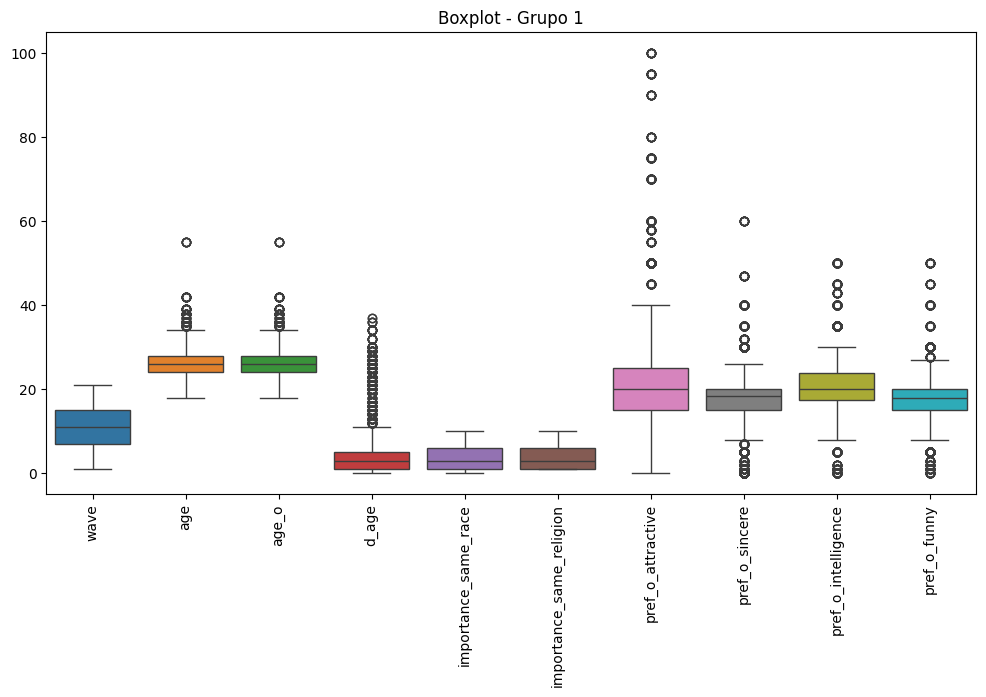

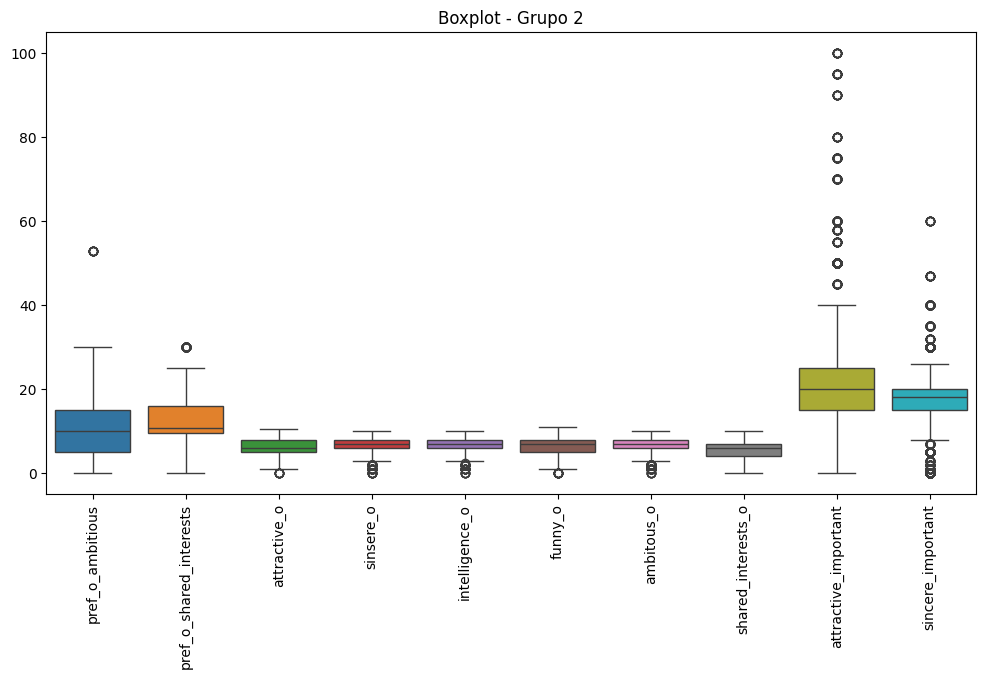

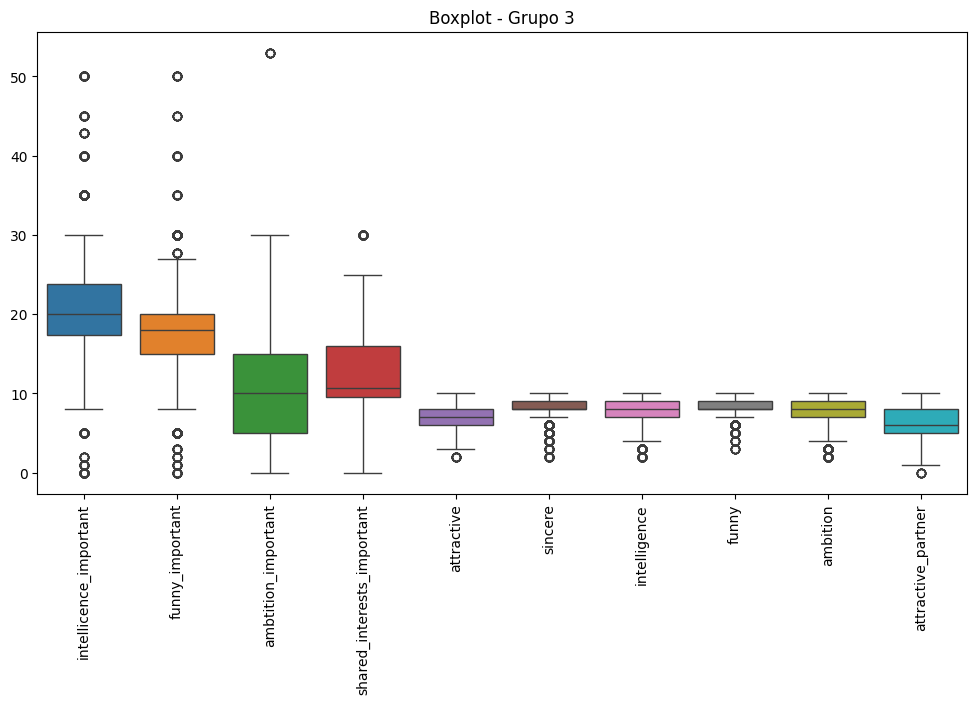

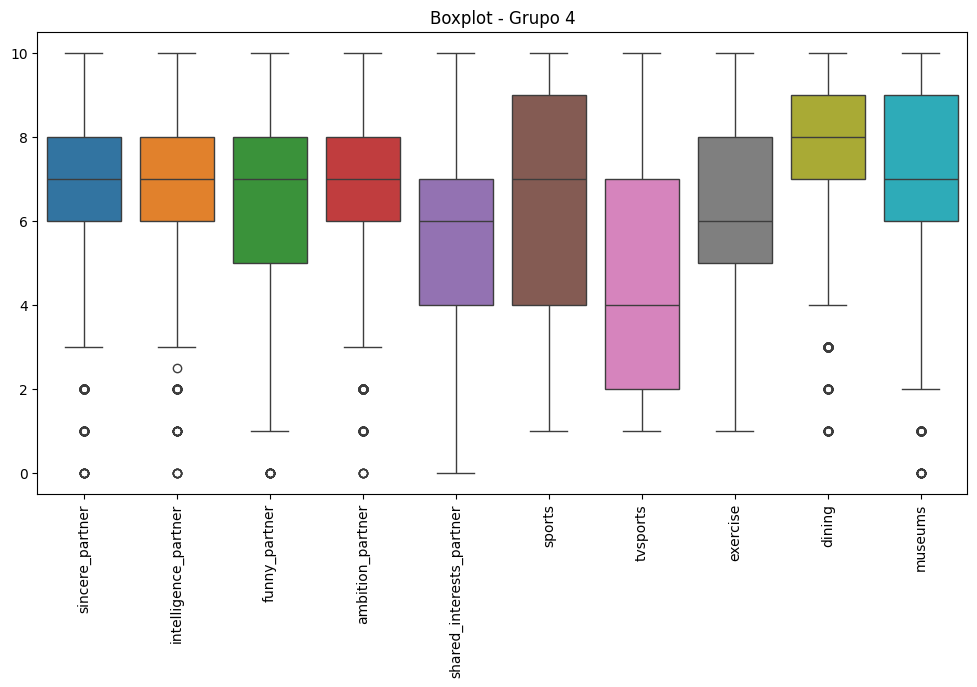

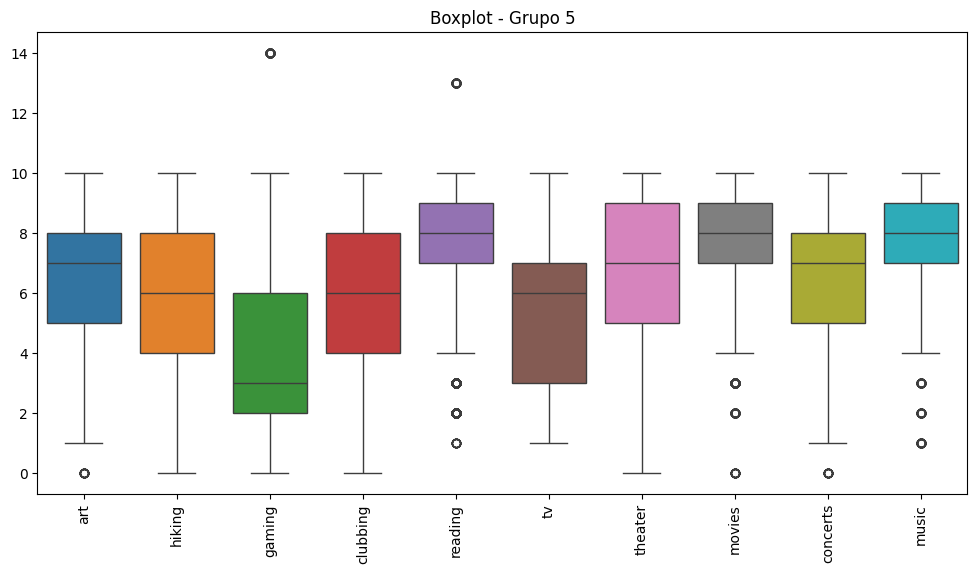

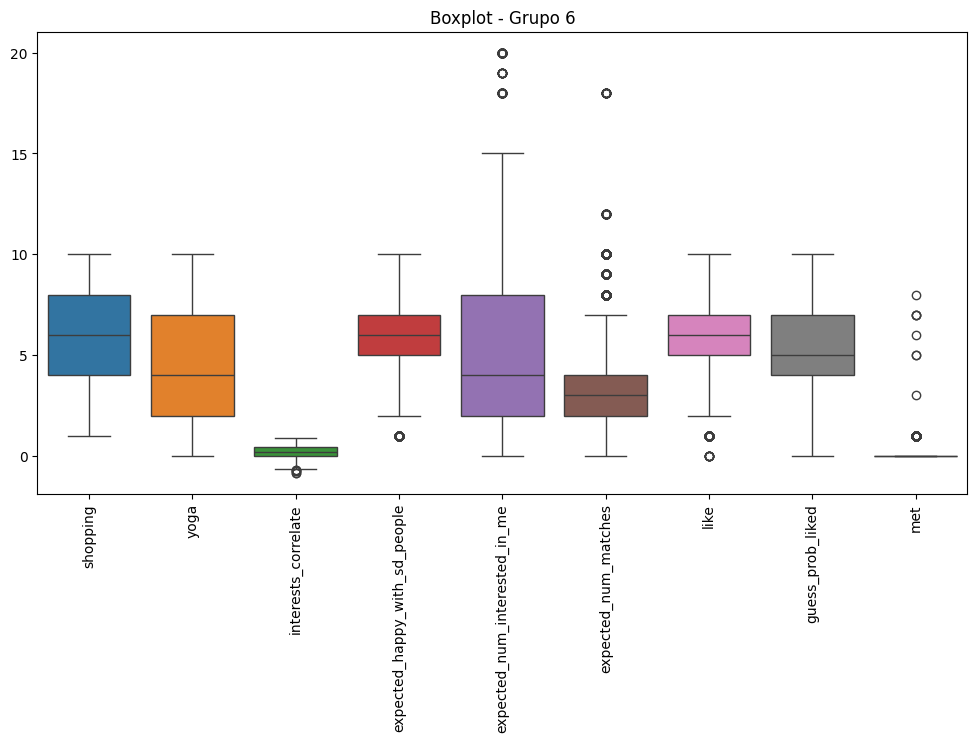

In [34]:
# colunas numéricas
numeric_cols = df.select_dtypes(include=["number"]).columns

# 10 colunas por gráfico
group_size = 10
num_groups = (len(numeric_cols) // group_size) + 1

# boxplots em grupos
for i in range(num_groups):
    cols = numeric_cols[i * group_size : (i + 1) * group_size]
    if len(cols) == 0:
        continue

    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df[cols])
    plt.xticks(rotation=90)  # Rotacionar os labels para melhor visualização
    plt.title(f"Boxplot - Grupo {i+1}")
    plt.show()


**Grupo 1**  
- Variáveis como pref_o_attractive, pref_o_sincere, pref_o_intelligence e pref_o_funny possuem vários pontos fora dos limites -- prováveis notas fora do padrão

- Variáveis age e age_o também apresenta alguns outliers, podendo indicar alguns participantes com idades bem diferentes da maioria --> pode ser útil para verificar se existe um perfil de idade que foge do padrão.

**Grupo 2**
- Variáveis attractive_important e sincere_important possuem uma grande quantidade de outliers (com valores bem acima da média) -- prováveis notas fora do padrão.

**Grupo 3**
- Variáveis intelligence_important, funny_important, ambition_important e shared_interests_important apresentam a maior dispersão, com algumas pessoas atribuindo valores muito altos a essas características.



**Tendência geral**: variáveis de importância (_importance) tem maior variabilidade e mais outliers do que características diretas (sincere, intelligente, etc), o que mostra que há um consenso maior sobre as características percebidas, mas uma diferença significativa sobre o quanto elas são consideradas importantes/essenciais.

## Distribuição dos dados

### Idades

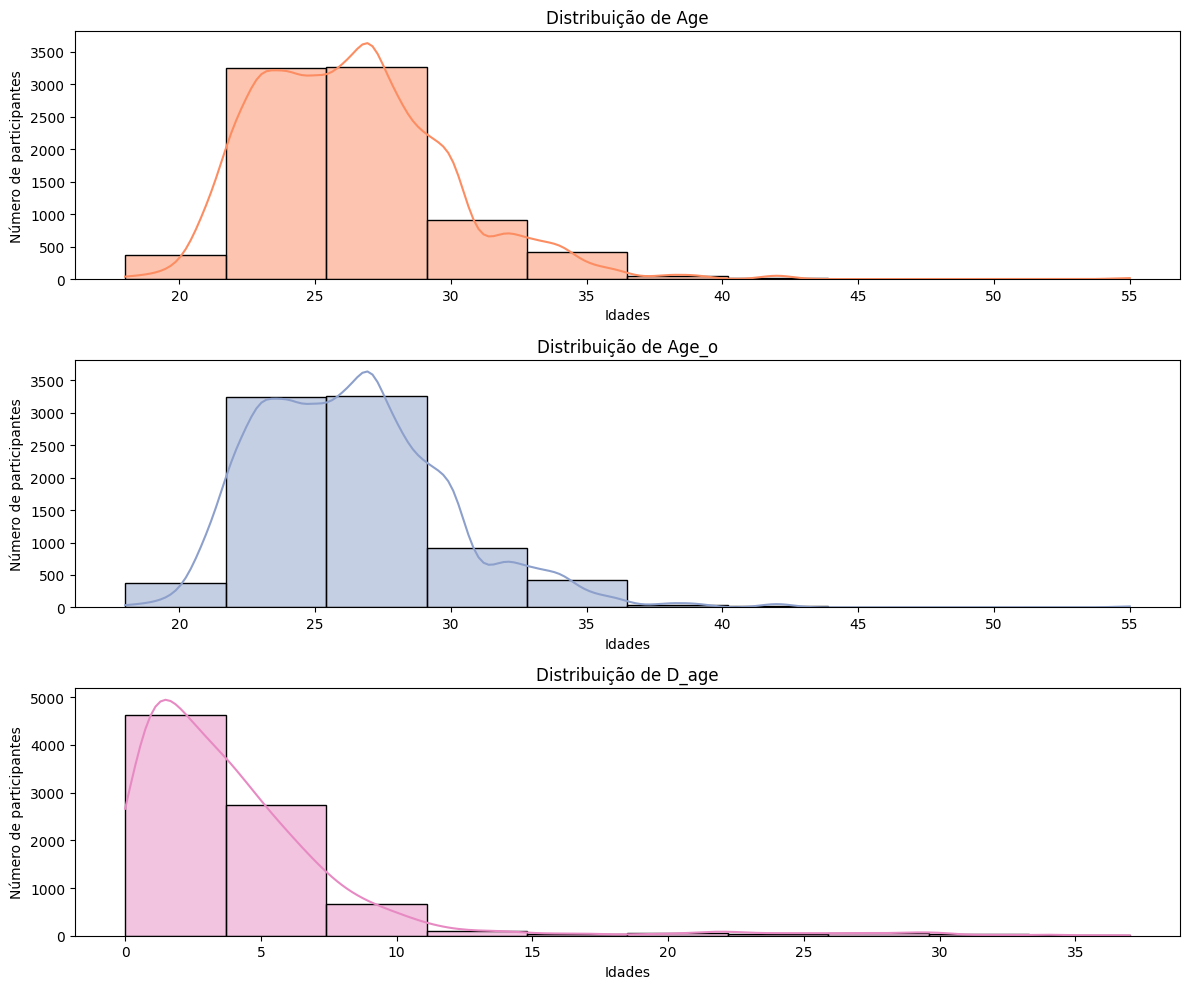

In [63]:
ages = ['age', 'age_o', 'd_age']

# múltiplos histogramas
plt.figure(figsize=(12, 10))

num_colors = len(sns.color_palette("Set2"))
for i, interest in enumerate(ages, 1):
    plt.subplot(3, 1, i)
    sns.histplot(df[interest], bins=10, kde=True, color=sns.color_palette("Set2")[i % num_colors])
    plt.title(f'Distribuição de {interest.capitalize()}')
    plt.xlabel('Idades')
    plt.ylabel('Número de participantes')

plt.tight_layout()
plt.show()

- A maioria dos participantes tem idades próximas, com uma diferença curta entre 0 e 5 anos.

### Atributos

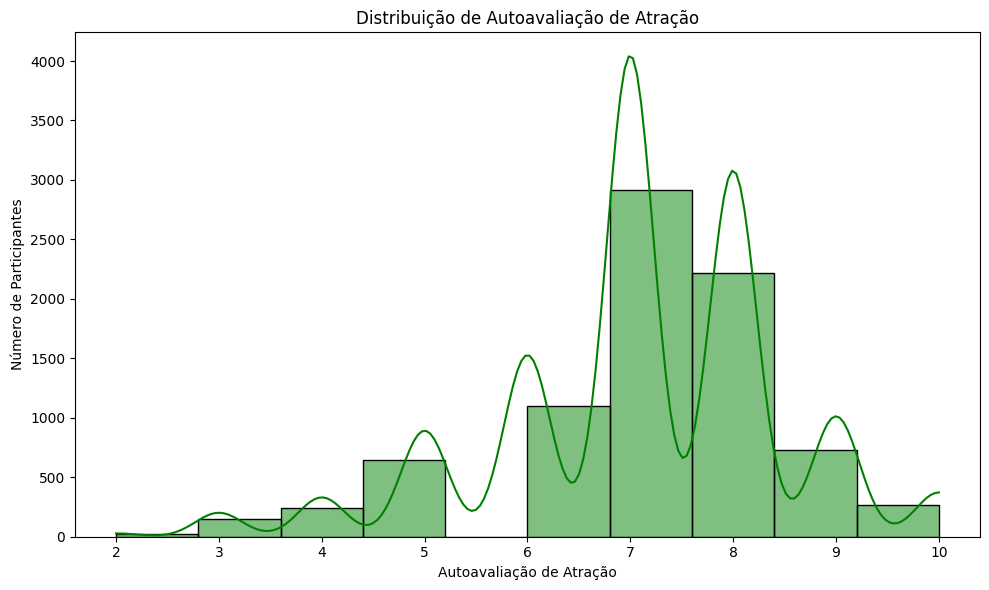

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(df['attractive'], bins=10, kde=True, color='green')

plt.title('Distribuição de autoavaliação de atração')
plt.xlabel('Autoavaliação de atração')
plt.ylabel('Número de participantes')
plt.tight_layout()
plt.show()

- Pessoas tendem a se autoavaliar com notas médias (7 e 8).

### Interesses pessoais

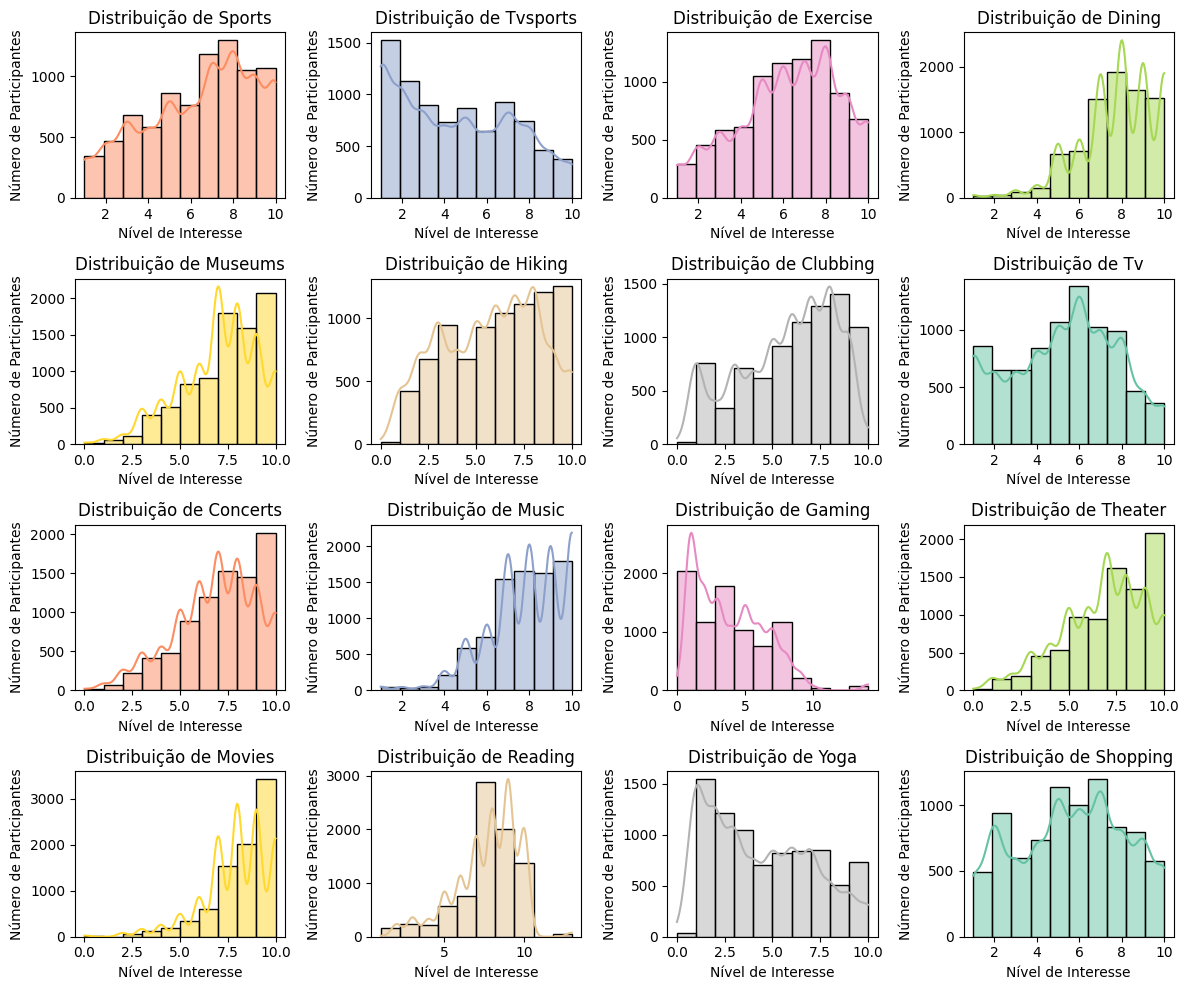

In [38]:
interests = ['sports', 'tvsports', 'exercise', 'dining', 'museums', 'hiking', 'clubbing', 'tv', 'concerts', 'music', 'gaming', 'theater', 'movies', 'reading', 'yoga', 'shopping']

# múltiplos histogramas
plt.figure(figsize=(12, 10))

num_colors = len(sns.color_palette("Set2"))
for i, interest in enumerate(interests, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[interest], bins=10, kde=True, color=sns.color_palette("Set2")[i % num_colors])
    plt.title(f'Distribuição de {interest.capitalize()}')
    plt.xlabel('Nível de Interesse')
    plt.ylabel('Número de Participantes')

plt.tight_layout()
plt.show()

### De preferências//?

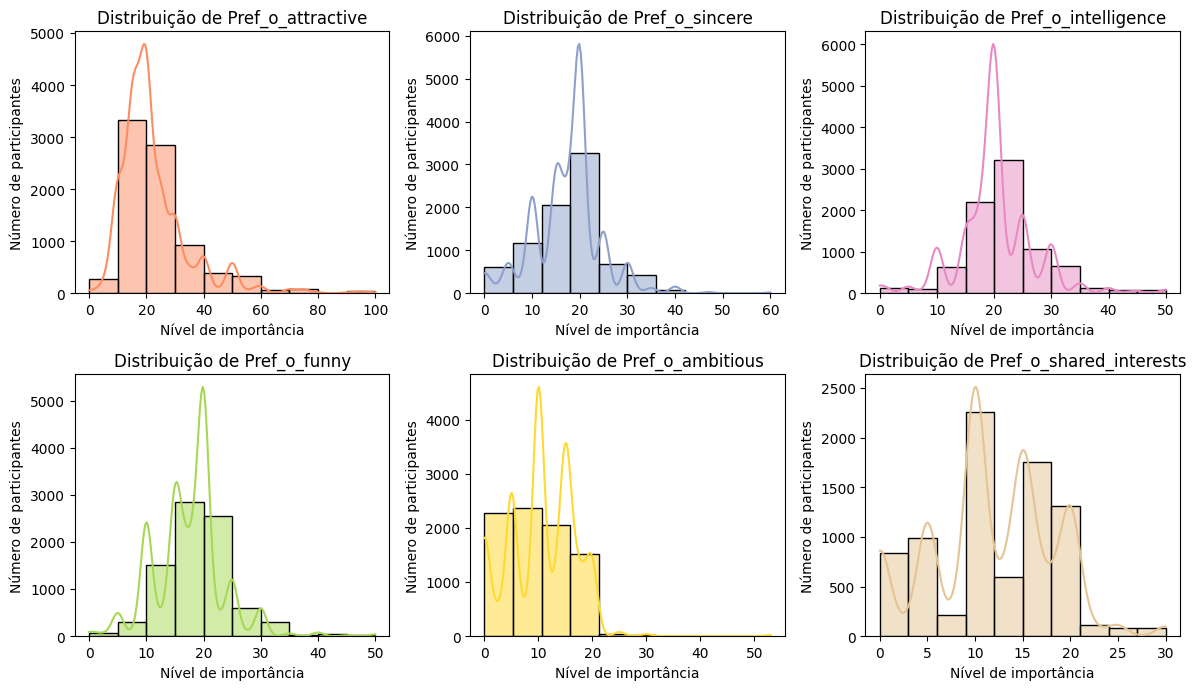

In [68]:
preferences = ['pref_o_attractive', 'pref_o_sincere', 'pref_o_intelligence', 'pref_o_funny', 'pref_o_ambitious', 'pref_o_shared_interests']

# múltiplos histogramas
plt.figure(figsize=(12, 10))

num_colors = len(sns.color_palette("Set2"))
for i, interest in enumerate(preferences, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[interest], bins=10, kde=True, color=sns.color_palette("Set2")[i % num_colors])
    plt.title(f'Distribuição de {interest.capitalize()}')
    plt.xlabel('Nível de importância')
    plt.ylabel('Número de participantes')

plt.tight_layout()
plt.show()

## Análise de Match

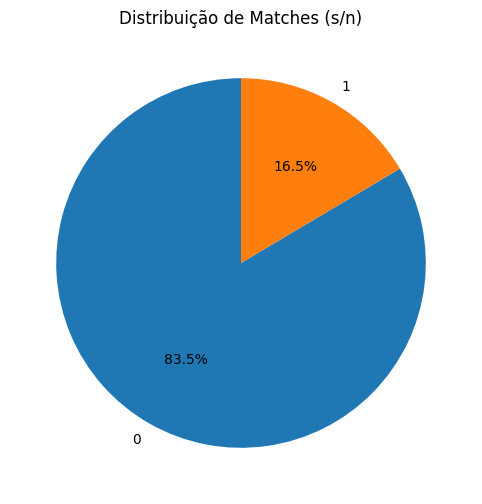

In [39]:
# cálculo da distribuição de matches
match_counts = df['match'].value_counts()

# pie chart
match_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 6), startangle=90)

plt.title('Distribuição de Matches (s/n)')
plt.ylabel('')
plt.show()

- Apenas 16.5% teve sucesso em seus encontros em relação ao total de encontros

### Por gênero

        pref_o_attractive  pref_o_sincere  pref_o_intelligence  pref_o_funny  \
gender                                                                         
female          26.893883       16.497231            19.545869     17.769880   
male            18.055224       18.305008            21.002502     17.147292   

        pref_o_ambitious  pref_o_shared_interests  
gender                                             
female          8.554378                10.996568  
male           12.827222                12.704194  


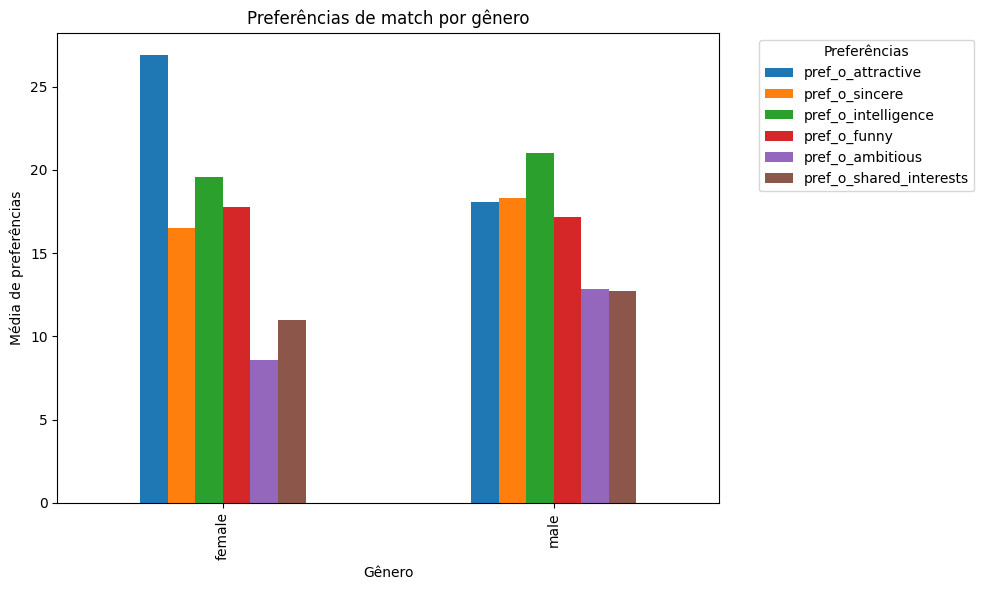

In [45]:
preferencias = [
    'pref_o_attractive',
    'pref_o_sincere',
    'pref_o_intelligence',
    'pref_o_funny',
    'pref_o_ambitious',
    'pref_o_shared_interests'
]

# média de preferências por gênero
mean_preferences_by_gender = df.groupby('gender')[preferencias].mean()

print(mean_preferences_by_gender)

# gráfico de barras
mean_preferences_by_gender.plot(kind='bar', figsize=(10, 6))

plt.title('Preferências de match por gênero')
plt.xlabel('Gênero')
plt.ylabel('Média de preferências')
plt.legend(title='Preferências', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

- Mulheres dizem ter mais preferência por atração, enquanto ser inteligente, engraçado e sincero também são valorizados e apresentam um equilíbrio;
- Homens apresentam maior preferência por inteligência, enquanto ser atrativa, sincera e engraçada se equilibram mostrando valores próximos também.

### Por faixa etária

<ipython-input-41-e1b027d90e31>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  match_rate_by_age_group = df.groupby('age_group')['match'].mean()
<ipython-input-41-e1b027d90e31>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=match_rate_by_age_group.index, y=match_rate_by_age_group.values, palette='viridis')


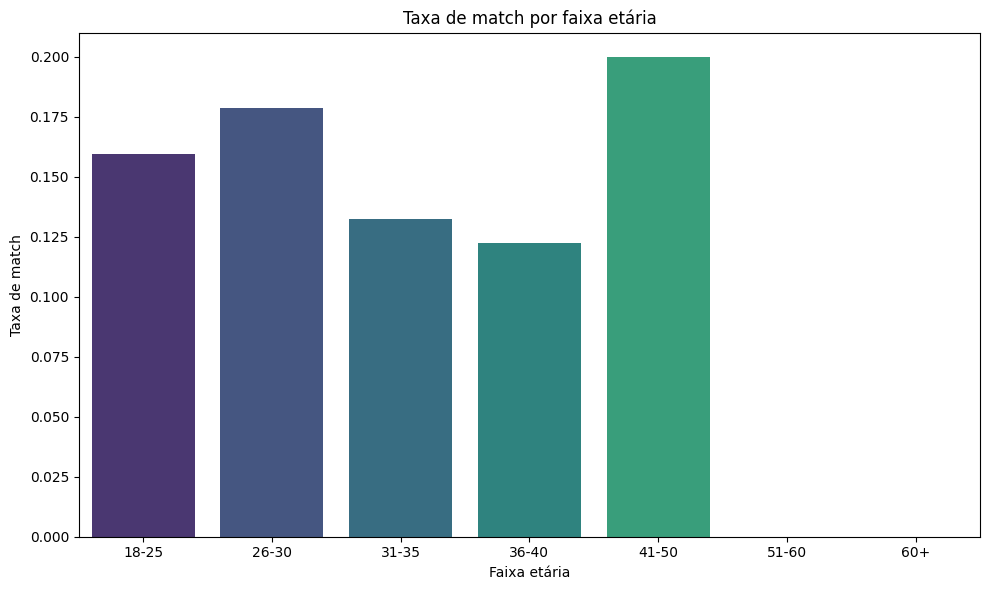

In [41]:
df['match'] = df['match'].astype(int)

# faixas etárias
bins = [18, 25, 30, 35, 40, 50, 60, 100]
labels = ['18-25', '26-30', '31-35', '36-40', '41-50', '51-60', '60+']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# taxa de match por faixa etária
match_rate_by_age_group = df.groupby('age_group')['match'].mean()

# gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=match_rate_by_age_group.index, y=match_rate_by_age_group.values, palette='viridis')

plt.title('Taxa de match por faixa etária')
plt.xlabel('Faixa etária')
plt.ylabel('Taxa de match')
plt.tight_layout()
plt.show()

### Por faixa de autoavaliação de atração

<ipython-input-44-f7bd954311f0>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  match_rate_by_attractive_group = df.groupby('attractive_group')['match'].mean()
<ipython-input-44-f7bd954311f0>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=match_rate_by_attractive_group.index, y=match_rate_by_attractive_group.values, palette='viridis')


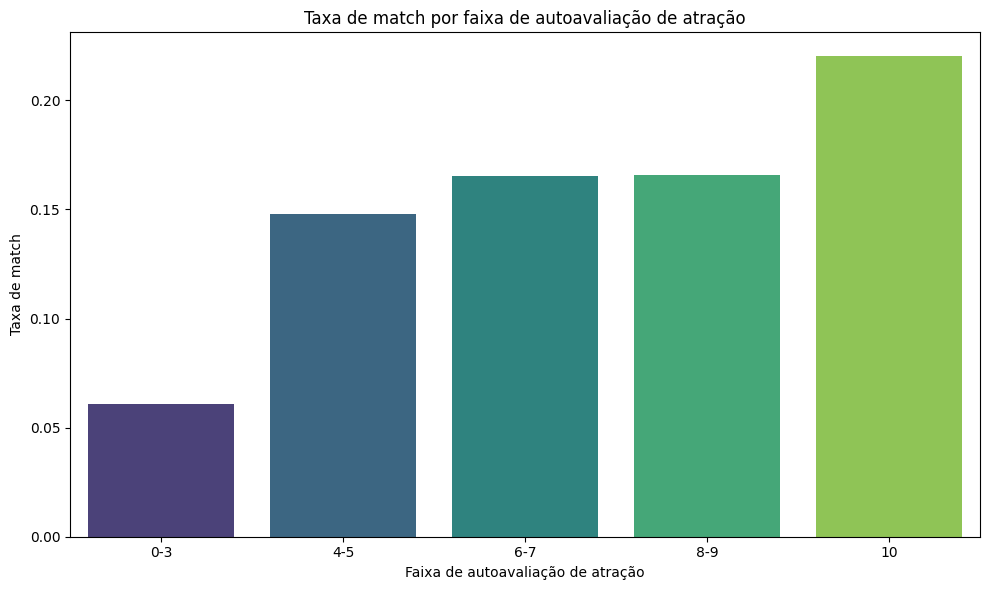

In [44]:
bins = [0, 3, 5, 7, 9, 10]
labels = ['0-3', '4-5', '6-7', '8-9', '10']

df['attractive_group'] = pd.cut(df['attractive'], bins=bins, labels=labels)

# taxa de match por faixa de autoavaliação
match_rate_by_attractive_group = df.groupby('attractive_group')['match'].mean()

# gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=match_rate_by_attractive_group.index, y=match_rate_by_attractive_group.values, palette='viridis')

plt.title('Taxa de match por faixa de autoavaliação de atração')
plt.xlabel('Faixa de autoavaliação de atração')
plt.ylabel('Taxa de match')
plt.tight_layout()
plt.show()

## Correlacionando as preferências dos homens e mulheres

In [76]:
# considerando apenas as mulheres
df_mulheres = df[df['gender'] == 'female']  # Supondo que 'gender' tenha valores como 'female' para mulheres

# correlação entre 'attractive_important' e 'attractive_partner' para mulheres
correlacao_mulheres = df_mulheres['attractive_important'].corr(df_mulheres['attractive_partner'])

print(f"Correlação entre a importância da atração e a avaliação de atração no parceiro (somente p mulheres): {correlacao_mulheres:.4f}")

Correlação entre a importância da atração e a avaliação de atração no parceiro (somente p mulheres): -0.0418


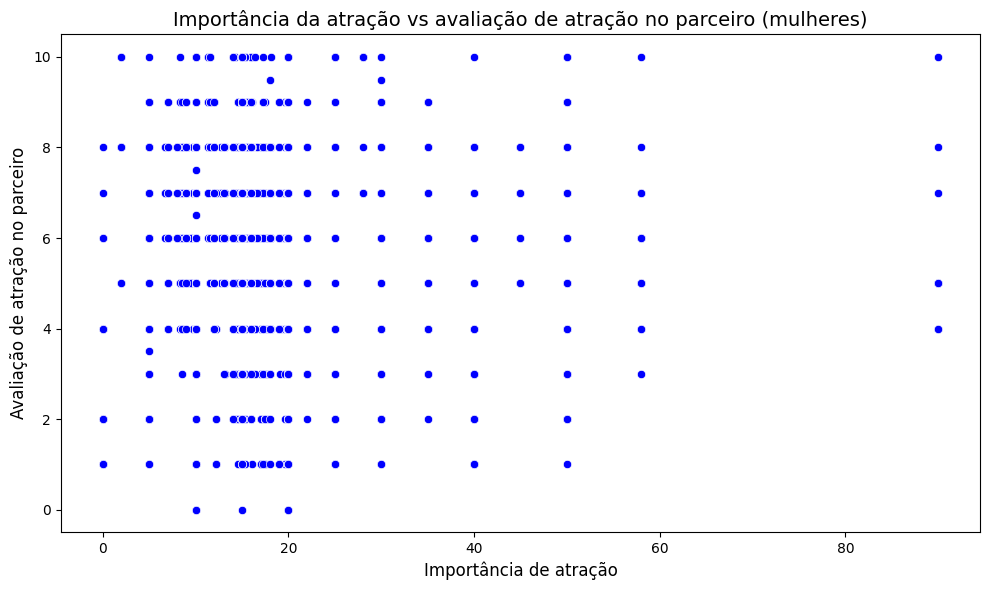

In [84]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='attractive_important', y='attractive_partner', data=df_mulheres, color='blue')

plt.title('Importância da atração vs avaliação de atração no parceiro (mulheres)', fontsize=14)
plt.xlabel('Importância de atração', fontsize=12)
plt.ylabel('Avaliação de atração no parceiro', fontsize=12)
plt.tight_layout()
plt.show()

- Pontos muito dispersos ao longo das variáveis, mostrando que não existe uma correlação forte entre a importância atribuída à atração e a avaliação dada ao parceiro pelas mulhere. Ou seja, mulheres que dão alta importância à atração não estão necessariamente avaliando a atração do parceiro de maneira alta, e vice-versa.
- Talvez, a percepção de atração possa ser influenciada por outros fatores além da importância atribuída

<ipython-input-86-a5de6ef3972e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mulheres['attractive_important_group'] = pd.cut(df_mulheres['attractive_important'], bins=bins, labels=labels)
<ipython-input-86-a5de6ef3972e>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_attractive_partner_by_group = df_mulheres.groupby('attractive_important_group')['attractive_partner'].mean()
<ipython-input-86-a5de6ef3972e>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` 

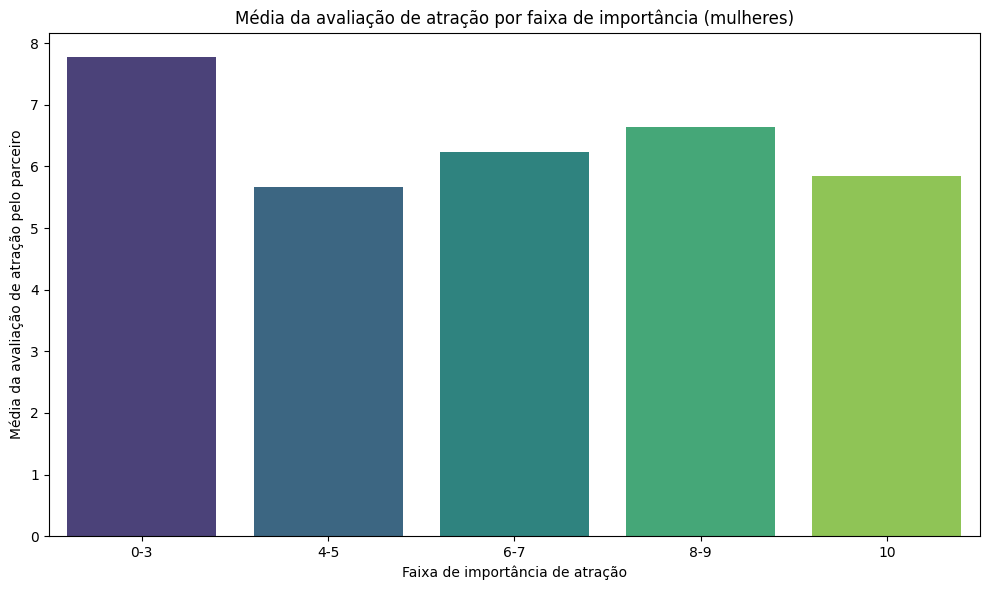

In [86]:
# faixas de importância de atração
bins = [0, 3, 5, 7, 9, 10]
labels = ['0-3', '4-5', '6-7', '8-9', '10']

df_mulheres['attractive_important_group'] = pd.cut(df_mulheres['attractive_important'], bins=bins, labels=labels)

mean_attractive_partner_by_group = df_mulheres.groupby('attractive_important_group')['attractive_partner'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=mean_attractive_partner_by_group.index, y=mean_attractive_partner_by_group.values, palette='viridis')
plt.title('Média da avaliação de atração por faixa de importância (mulheres)')
plt.xlabel('Faixa de importância de atração')
plt.ylabel('Média da avaliação de atração pelo parceiro')
plt.tight_layout()
plt.show()

In [78]:
df_homens = df[df['gender'] == 'male']

correlacao_homens = df_mulheres['intellicence_important'].corr(df_mulheres['intelligence_partner'])

# Exibir o valor da correlação
print(f"Correlação entre a importância da atração e a avaliação de atração no parceiro (somente p homens): {correlacao_homens:.4f}")

Correlação entre a importância da atração e a avaliação de atração no parceiro (somente p homens): -0.0668
